## Исследотельский анализ данных зарплат более чем 6000 работников IT рынка.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot


In [33]:
df = pd.read_csv(r"C:\Users\Bulat\Desktop\Всякое\анализ данных\pandas проекты\Новая папка\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [35]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Удалим все повторяющиеся и нулевые данные

In [36]:
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df = df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
1787,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
1788,27.0,Male,High School,Sales Manager,2.0,40000.0
1789,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
1790,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


##

### 

## Из первых и последних 5 строк в dataframe видно, что в 'Educational Level' одни и те же данные записаны по разному. Например, Bachelor's и Bachelor's Degree.

In [37]:
df['Education Level'].value_counts()

Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: Education Level, dtype: int64

## Приведем данные к одинаковому виду с помощью функции replace.

In [44]:
df['Education Level'].replace("Bachelor's Degree", "Bachelor's", inplace = True)
df['Education Level'].replace("Master's Degree", "Master's", inplace = True)
df['Education Level'].replace("phD", "PhD", inplace = True)
df['Education Level'].value_counts()

Bachelor's     768
Master's       568
PhD            341
High School    110
Name: Education Level, dtype: int64

##

### 

## Выведем матрицу корреляции для трех основных метрик: возвраст, опыт работы, зарплата.

C:\Users\Bulat\AppData\Local\Temp\ipykernel_11976\791426744.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



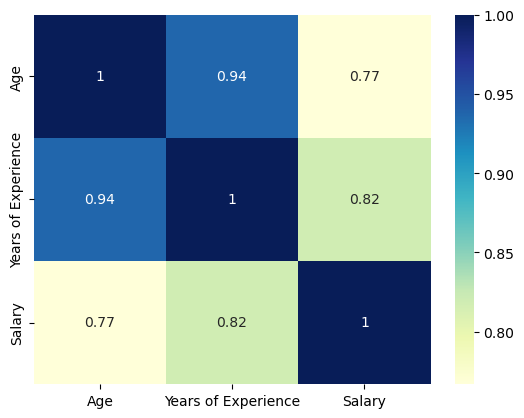

In [39]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

## Из этой матрицы явно видно, что величины сильно зависимы друг от друга.

### 

### 

## Гистограммы для всех метрик.

<Axes: >

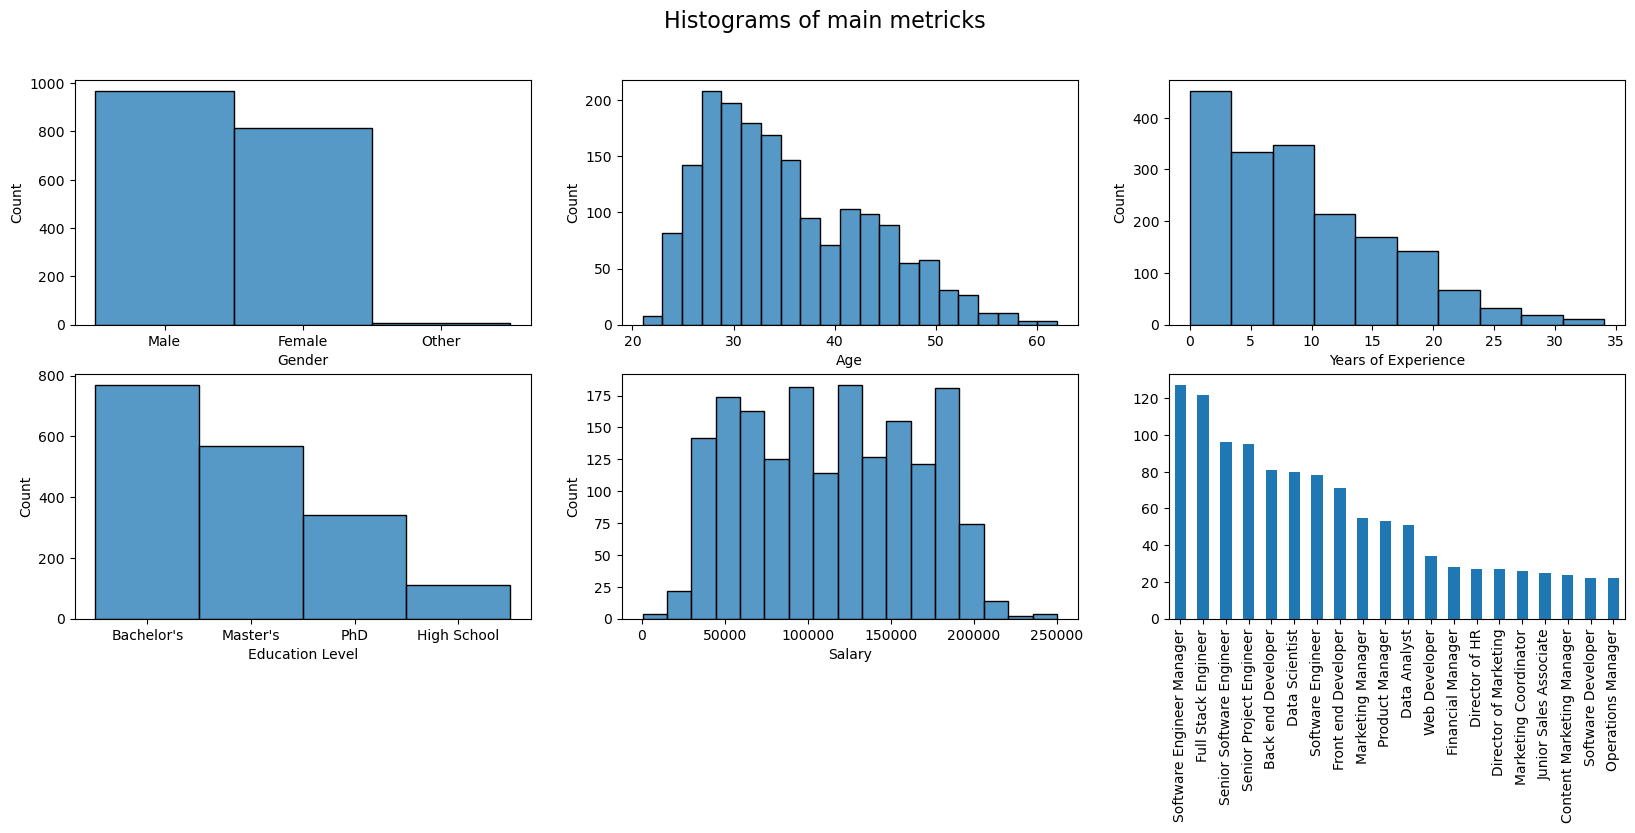

In [45]:
fig, ax = plt.subplots(2, 3, figsize = (20,7))
fig.suptitle('Histograms of main metricks', fontsize=16)
sns.histplot(df, x = 'Gender', ax = ax[0,0])
sns.histplot(df, x = 'Age', ax = ax[0,1])
sns.histplot(df, x = 'Years of Experience', ax = ax[0,2], bins = 10)
sns.histplot(df, x = 'Education Level', ax = ax[1,0])
sns.histplot(df, x = 'Salary', ax = ax[1,1])
df['Job Title'].value_counts()[:20].plot(kind = 'bar', ax = ax[1,2])

##

##

##

## Перейдем к самому интересному: от чего зависит зарплата. В том числе: пол, образование, возвраст, опыт работы.

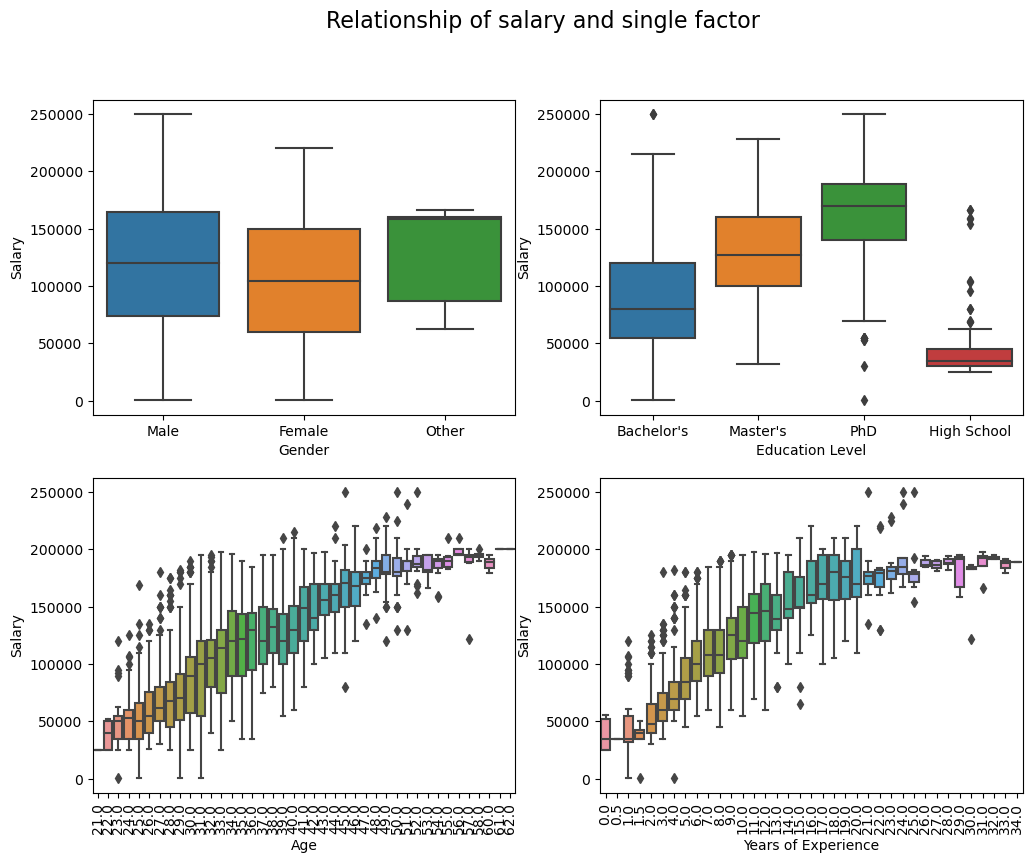

In [46]:
fig, ax = plt.subplots(2, 2, figsize = (12, 9))
fig.suptitle('Relationship of salary and single factor', fontsize=16)
sns.boxplot(x = 'Gender', y = 'Salary', data = df, ax = ax[0,0])
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax = ax[0,1])
g = sns.boxplot(x = 'Age', y = 'Salary', data = df, ax = ax[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g = sns.boxplot(x = 'Years of Experience', y = 'Salary', data = df, ax = ax[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()

## Видно, что в среднем мужчины получают больше чем женщины. Уровень образования, конечно же, влияет на уровень образования. Возраст, как и опыт работы, также сильно влияют на зарплату. Чем больше человек знает - тем больше он получает.

##

### 

## Рассмотрим 20 самых распространенных профессий на рынке и посмотрим, как растет их зарплата по мере работы.

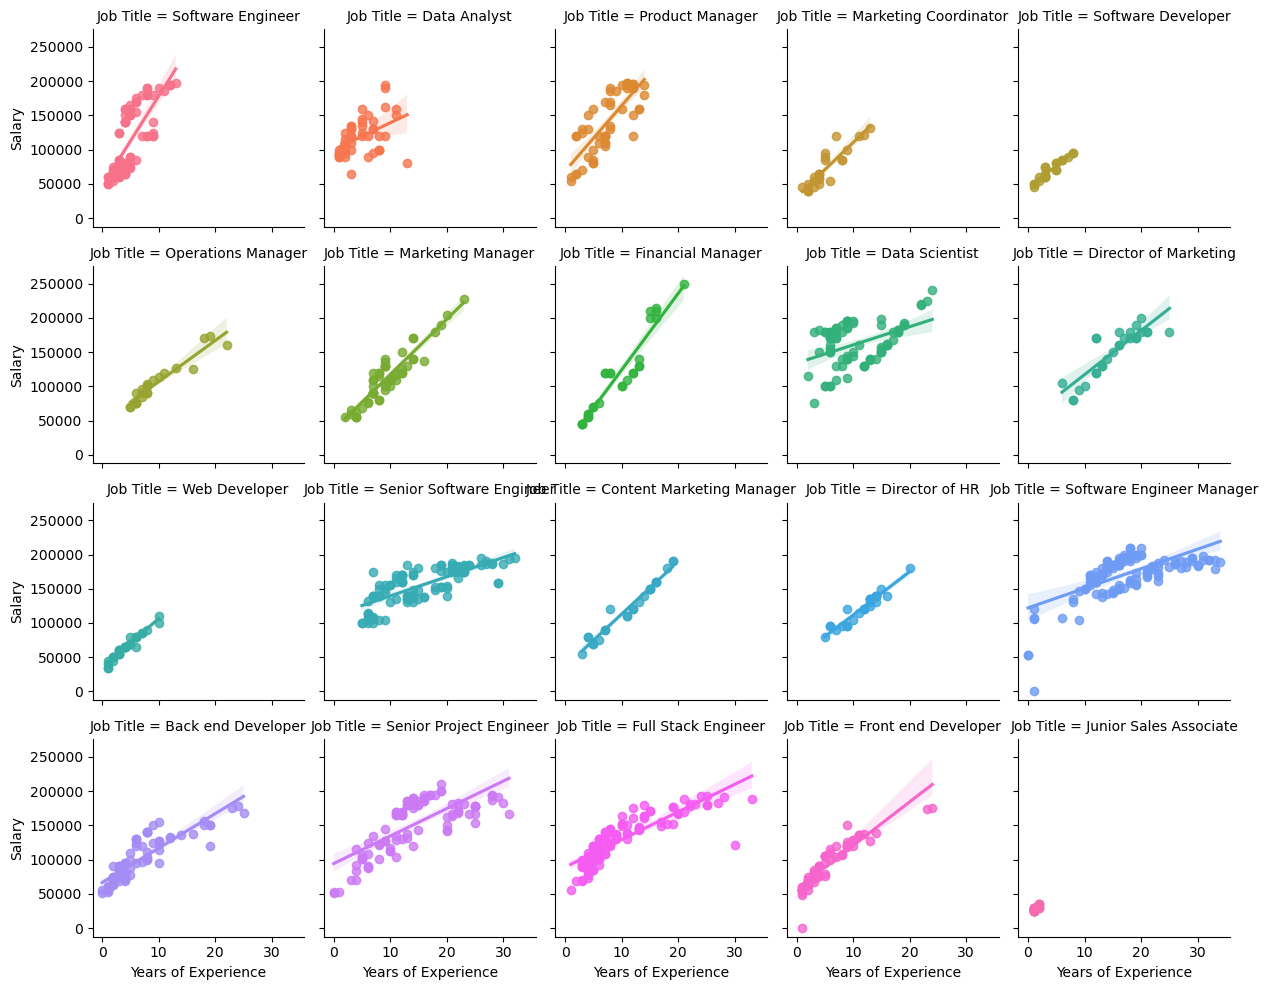

In [50]:
#fig.suptitle('Relationship of salary and YOE for different jobs', fontsize=16)
pop_jobs = df['Job Title'].value_counts()[:20].index
fig.suptitle('Relationship of salary and YOE for different jobs', fontsize=16)
pop_jobs_data = df[df['Job Title'].isin(pop_jobs)]
sns.lmplot(data=pop_jobs_data, x='Years of Experience', y='Salary', hue='Job Title', col='Job Title',col_wrap=5, height=2.5, aspect=1)

##

### 

### 

## Перейдем к подробному рассмотрению полов.

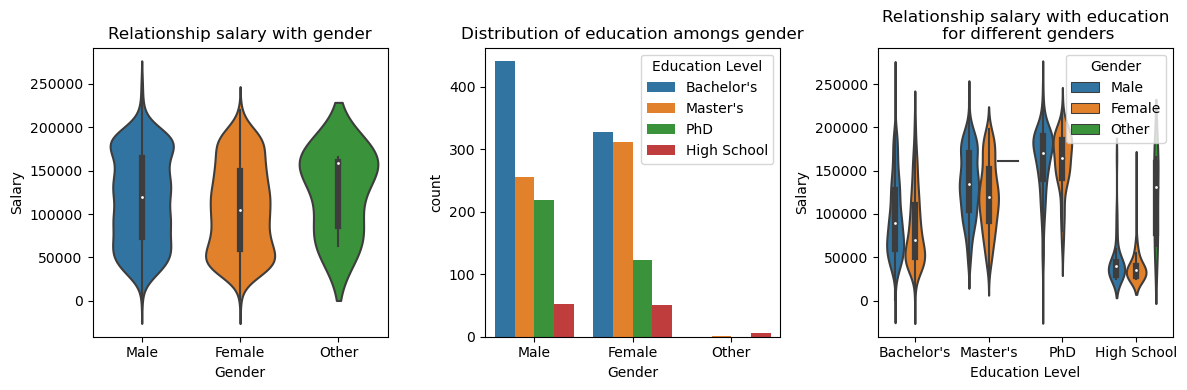

In [48]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))
g = sns.violinplot(x = 'Gender', y = 'Salary', data = df, ax = ax[0])
g.set_title('Relationship salary with gender')
g = sns.countplot(x = 'Gender', hue = 'Education Level', data = df, ax = ax[1])
g.set_title('Distribution of education amongs gender')
g = sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax = ax[2], hue ='Gender')
g.set_title('Relationship salary with education\n for different genders')
plt.tight_layout()

## Из распределения уровня образования видно, что участников с неизвестным полом абсолютное меньшинство, их можно считать за вброс.

## Очень интересно, что примерно половина мужчин бакалавров не продолжают обучение в магистратуре / аспирантуре, в отличие от девушек, большинство которых продолжают обучение в магистратуре.

## Также очень наблюдательно, что с каждым новым дипломом разница между зарплатами мужчин и женщин уменьшается.